## Day 2: Classification Algorithms and Support Vector Machines

### 1. Setup

In [7]:
!pip install numpy matplotlib scikit-learn

#### 2. Import Libraries & The "Visualization Engine"

In [19]:
import numpy as np
import matplotlib.pyplot as plt



# Pedagogical Note:
# In engineering, seeing the "Decision Boundary" is more important than just the accuracy score.
# This function plots the sensor data and the line/curve the model draws to separate classes.

def plot_decision_boundary(model, X, y, title="Model Decision Boundary"):
    # Create a meshgrid to plot the background colors (the model's decision zones)
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict the function value for the whole grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    # Plot the contour (the background zones)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    
    # Plot the actual data points
    # Class 0: Normal Operation (Blue)
    # Class 1: System Failure (Red)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', s=100)
    plt.xlabel('Sensor 1: Pressure (Bar)')
    plt.ylabel('Sensor 2: Temperature (C)')
    plt.title(title)
    plt.show()

print("Setup Complete. Visualization function ready.")

Setup Complete. Visualization function ready.


### 3. The Linear Engineering Problem

Scenario: A Hydraulic Pump.
Rule: If Pressure is high AND Temperature is high : System Failure.
Geometry: This is a "Linear Problem" because we can draw a straight line to separate safe states from dangerous states.

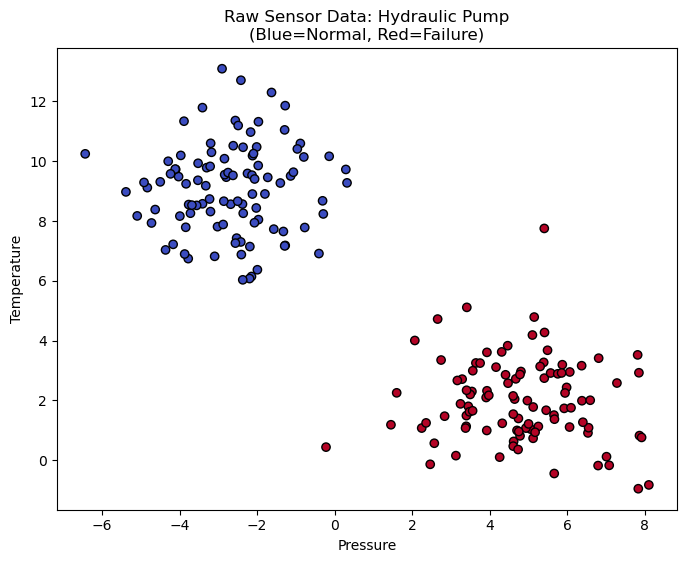

In [ ]:
# Generate two clusters simulating sensor data:
# Cluster 1: Low Pressure & Temperature (Normal Operation)
# Cluster 2: High Pressure & Temperature (System Failure)
from sklearn.datasets import make_blobs, make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# make_blobs creates distinct Gaussian clusters; useful for linearly separable cases
X_linear, y_linear = make_blobs(n_samples=200, centers=2, random_state=42, cluster_std=1.5)

# Visualize the generated data to confirm distribution and separation
plt.figure(figsize=(8, 6))
plt.scatter(X_linear[:, 0], X_linear[:, 1], c=y_linear, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title("Raw Sensor Data: Hydraulic Pump\n(Blue=Normal, Red=Failure)")
plt.xlabel("Pressure")
plt.ylabel("Temperature")
plt.show()

#### 3.1 Logistic Regression (The Probabilistic Approach)


Logistic Regression is a supervised machine learning algorithm used for binary classification problems.
It models the probability of an outcome using the sigmoid (logistic) function, which maps any real-valued input to a value between 0 and 1.

Goal: Use the simplest algorithm. It creates a linear boundary.
Key Concept: Probability. "There is an 85% chance this is a fault."

Logistic Regression Accuracy: 100.00%


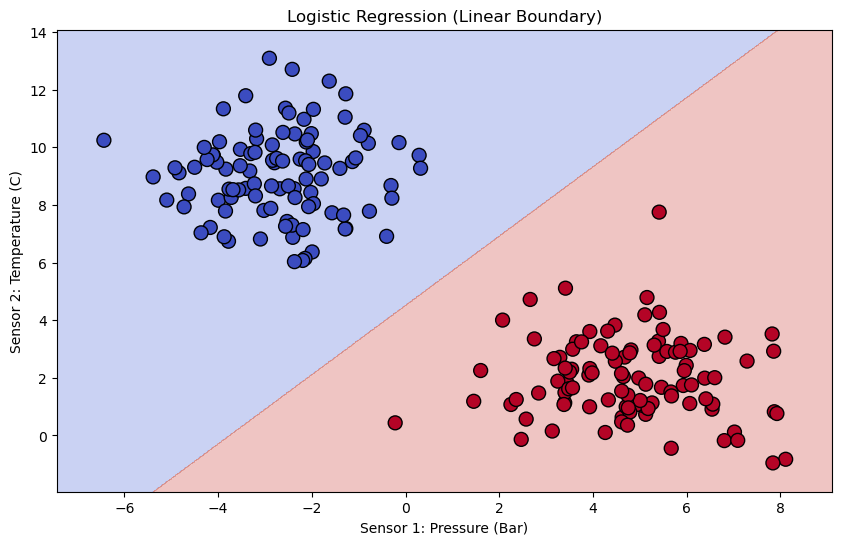

In [ ]:
# Logistic Regression: Model a binary outcome (normal vs. failure) using a linear boundary.
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model (linear by default)
log_reg = LogisticRegression()

# Fit (train) the model on sensor data—finds the best separating line
log_reg.fit(X_linear, y_linear)

# Evaluate model accuracy on the training data
print(f"Logistic Regression Accuracy: {log_reg.score(X_linear, y_linear)*100:.2f}%")

# Visualize: Decision boundary is a straight line for this linear problem
plot_decision_boundary(log_reg, X_linear, y_linear, title="Logistic Regression (Linear Boundary)")

#### 3.2 Support Vector Machines - Linear (The Geometric Approach)

Support Vector Machine (SVM) is a supervised learning algorithm used for classification and regression that works by finding the optimal hyperplane maximizing the margin between classes.
Using kernel functions, SVM can efficiently handle non-linear decision boundaries in high-dimensional feature spaces.

Key Concept: The Margin. SVM tries to put the "widest street" possible between the classes, making it more robust than Logistic Regression for future data.

Linear SVM Accuracy: 100.00%
Note: The line looks similar, but SVM calculated it differently (maximizing the gap).


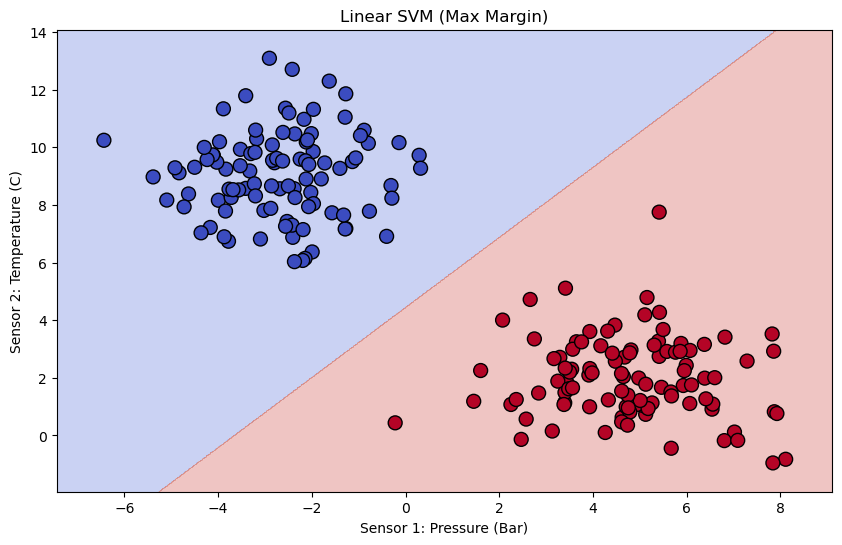

In [ ]:
# SVM tries to find the "Maximum Margin" (widest gap) between the classes.
from sklearn.svm import SVC
# 1. Initialize SVM with a Linear Kernel
# kernel='linear' forces the model to draw a straight line.
svm_linear = SVC(kernel='linear')

# 2. Train
svm_linear.fit(X_linear, y_linear)

# 3. Visualize
print(f"Linear SVM Accuracy: {svm_linear.score(X_linear, y_linear)*100:.2f}%")
print("Note: The line looks similar, but SVM calculated it differently (maximizing the gap).")
plot_decision_boundary(svm_linear, X_linear, y_linear, title="Linear SVM (Max Margin)")

#### 4. The Non-Linear Engineering Problem

Scenario: Temperature and Pressure in a Reactor Core, "Sweet Spot".

Rule: The system is safe only within a specific range.

Too Low = Bad.
Too High = Bad.
Middle = Good.
Geometry: This creates a "Donut" or "Bullseye" shape. You cannot cut a donut with a single straight knife cut to separate the hole from the dough.

#### 4.1 Generating Concentric Data

Goal: Create data that cannot be solved with a straight line.

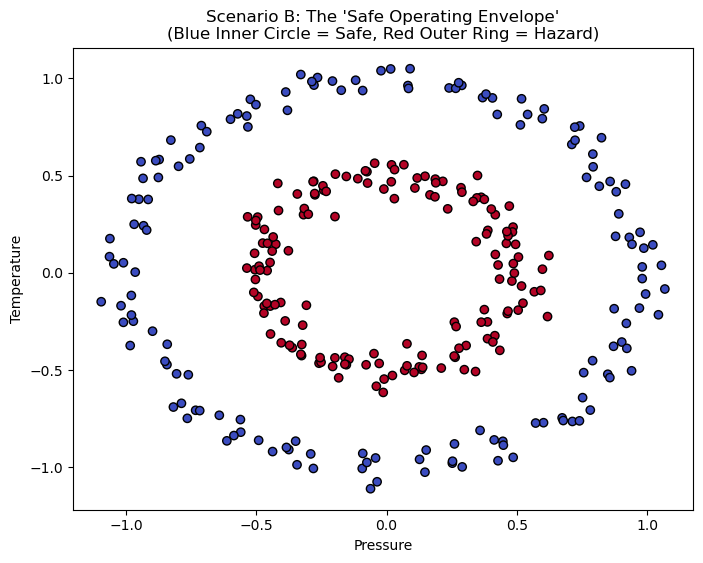

In [26]:
# In real engineering problems, danger is not always at "high" values.
# Most systems have a "safe zone" bounded on both sides—too low or too high is unsafe.
# Here, we create a synthetic dataset illustrating this: safe (inner) and unsafe (outer) regions.

# make_circles generates concentric circles: inner circle = safe, outer ring = hazard
X_circle, y_circle = make_circles(n_samples=300, noise=0.05, factor=0.5, random_state=42)

# Plot raw data for visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_circle[:, 0], X_circle[:, 1], c=y_circle, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title("Scenario B: The 'Safe Operating Envelope'\n(Blue Inner Circle = Safe, Red Outer Ring = Hazard)")
plt.xlabel("Pressure")
plt.ylabel("Temperature")
plt.show()

#### 4.2 The Failure of Linear Models

Linear SVM Accuracy on Circles: 53.67% (Terrible!)
Observation: The model tries to draw a straight line through a circle.
This is impossible. The model is 'Underfitting'.


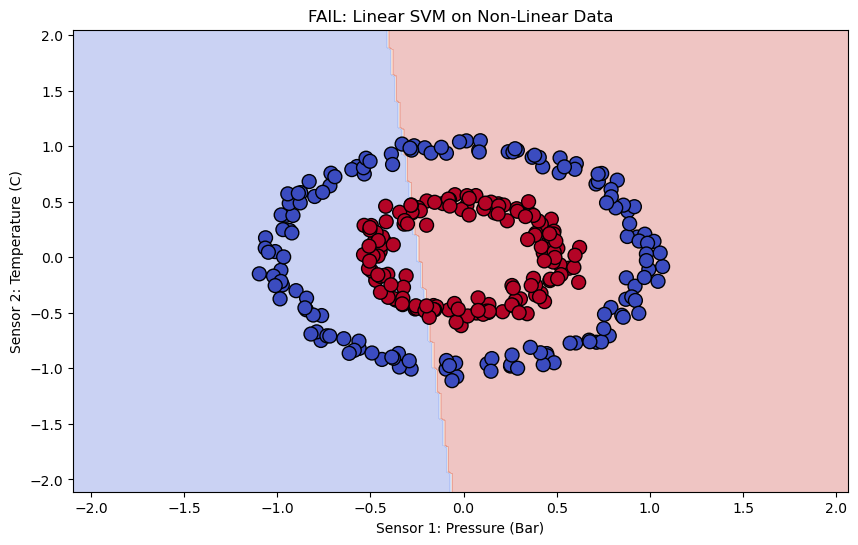

In [27]:
# Attempting to use a Linear SVM on non-linearly separable (circle) data.
# This will demonstrate the limitations of a linear model for this problem.

# 1. Fit a Linear SVM to the concentric circles.
svm_fail = SVC(kernel='linear')
svm_fail.fit(X_circle, y_circle)

# 2. Compute accuracy. Expect it to be close to random (around 50%) due to the non-linear structure.
acc = svm_fail.score(X_circle, y_circle)
print(f"Linear SVM Accuracy on Circles: {acc*100:.2f}% (Terrible!)")

# 3. Visualize. The linear SVM can only create a straight decision boundary,
#    which cannot correctly separate the inner "safe" circle from the outer "hazard" ring.
print("Observation: The model tries to draw a straight line through a circle.")
print("This is impossible. The model is 'Underfitting'.")
plot_decision_boundary(svm_fail, X_circle, y_circle, title="FAIL: Linear SVM on Non-Linear Data")

#### 4.3 The Solution - The Kernel Trick (RBF)

Goal: Introduce the RBF (Radial Basis Function) Kernel.
Explanation: We don't change the algorithm; we change the geometry. The Kernel Trick projects the 2D data into 3D space (like a mountain). The "Safe" data is the peak, the "Unsafe" data is the valley. We slice the mountain horizontally, creating a circular boundary.

Kernel SVM Accuracy: 100.00%
Observation: The model effectively wraps around the central 'Safe Zone'.


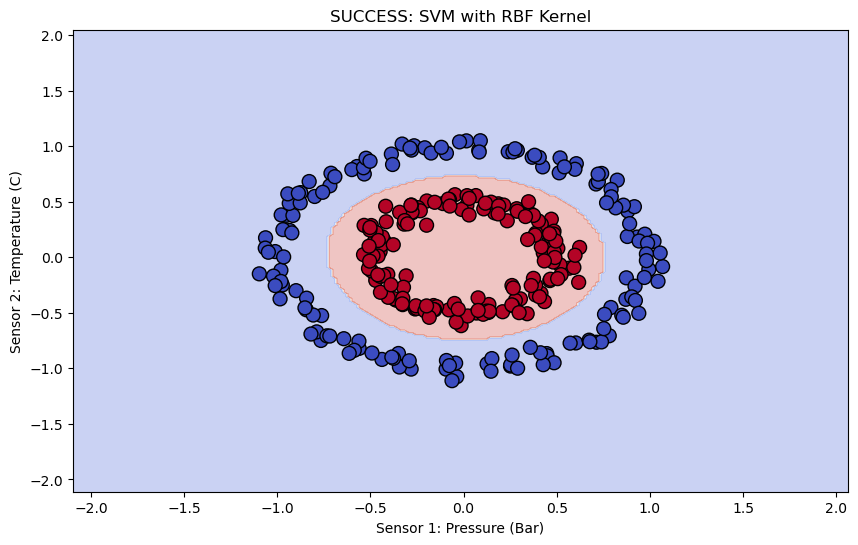

In [28]:

# Using SVM with an RBF (Radial Basis Function) kernel to handle non-linear class boundaries.
# The RBF kernel enables the SVM to find complex, non-linear separators—in this case, the circular safe zone.
# Setting gamma='scale' lets the model adapt gamma automatically to the data variance.

# 1. Initialize SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', gamma='scale')

# 2. Fit the model to the data (train)
svm_rbf.fit(X_circle, y_circle)

# 3. Evaluate and print accuracy - should be high, because RBF can handle the circle pattern
print(f"Kernel SVM Accuracy: {svm_rbf.score(X_circle, y_circle)*100:.2f}%")

# 4. Visualize: Decision boundary should hug the inner circle—demonstrating the kernel trick
print("Observation: The model effectively wraps around the central 'Safe Zone'.")
plot_decision_boundary(svm_rbf, X_circle, y_circle, title="SUCCESS: SVM with RBF Kernel")

#### 4.4 The Risk of Overfitting

Goal: Show what happens if the model becomes "too smart" (memorizing noise).


Hyperparameter: gamma.

Low Gamma = Smooth boundary (Generalizes well).

High Gamma = Jagged boundary (Overfits).

Visualizing RBF SVM with Gamma = 100


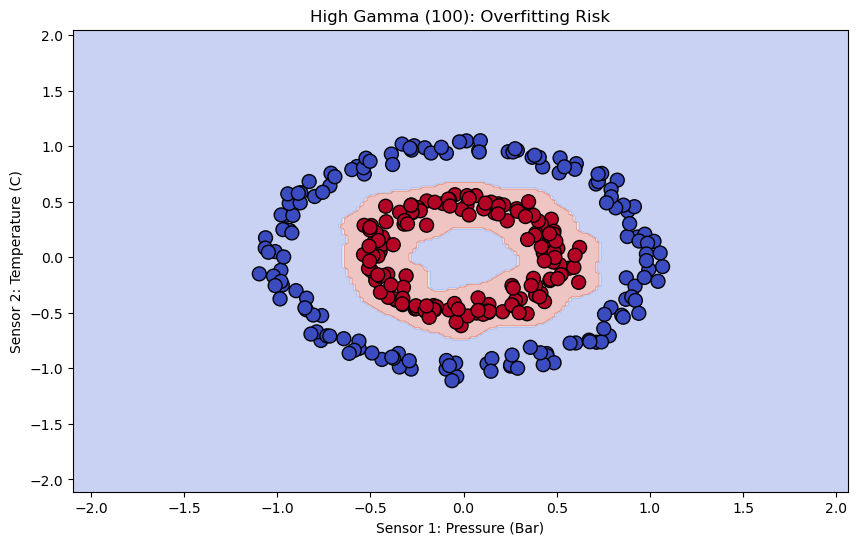

In [30]:
# Cell 9: Hyperparameter Tuning - Don't Overdo It!
# 'gamma' controls how tightly the model wraps around the data points.

# TRY CHANGING THIS VALUE:
# gamma = 0.1  (Very smooth, might underfit)
# gamma = 100  (Very jagged, creates 'islands' around noise points)
gamma_val = 100

svm_overfit = SVC(kernel='rbf', gamma=gamma_val)
svm_overfit.fit(X_circle, y_circle)

print(f"Visualizing RBF SVM with Gamma = {gamma_val}")
plot_decision_boundary(svm_overfit, X_circle, y_circle, title=f"High Gamma ({gamma_val}): Overfitting Risk")